## This workbook will be structured as follows:

### 1) Importing libraries and data
### 2) Creating a correlation matrix heatmap
### 3) Creating a correlation matrix heatmap in seaborn
### 4) Creating scatterplots
### 5) Creating a pair plot
### 6) Exploring Questions
### 7) Forming hypotheses
### 8) Exporting the dataset

# 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Setting path to data
path = r'C:\Users\mmoss\07-02-2022 NHL Data Analysis'


In [3]:
# Importing data_merged.csv
df_relationships = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'data_relationship.csv'), index_col = False)

In [4]:
# Calling the head
df_relationships.head()

,team_id,Assists,Goals,Shots,Hits,Blocked Shots,number_of_wins
0,1,662,404,4605,3305,2191,1691
1,2,825,495,5252,5204,3032,1743
2,3,771,456,4630,3731,2292,1768
3,4,865,506,5182,3798,2380,1735
4,5,854,504,5164,4496,2225,1786


# 2) Creating a Correlation Matrix Heatmap

In [5]:
# Adjusting to see all columns
pd.set_option('max_columns', None)

In [6]:
# Creating a correlation matrix
df_relationships.corr()

,team_id,Assists,Goals,Shots,Hits,Blocked Shots,number_of_wins
team_id,1.000000,-0.804611,-0.802367,-0.808238,-0.754787,-0.800510,-0.946163
Assists,-0.804611,1.000000,0.998478,0.968557,0.897862,0.923960,0.810865
Goals,-0.802367,0.998478,1.000000,0.977043,0.907705,0.933648,0.805111
Shots,-0.808238,0.968557,0.977043,1.000000,0.925364,0.956980,0.809805
Hits,-0.754787,0.897862,0.907705,0.925364,1.000000,0.935455,0.722770
Blocked Shots,-0.800510,0.923960,0.933648,0.956980,0.935455,1.000000,0.812574
number_of_wins,-0.946163,0.810865,0.805111,0.809805,0.722770,0.812574,1.000000


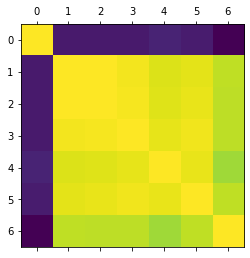

In [7]:
# Creating a correlation matrix

plt.matshow(df_relationships.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

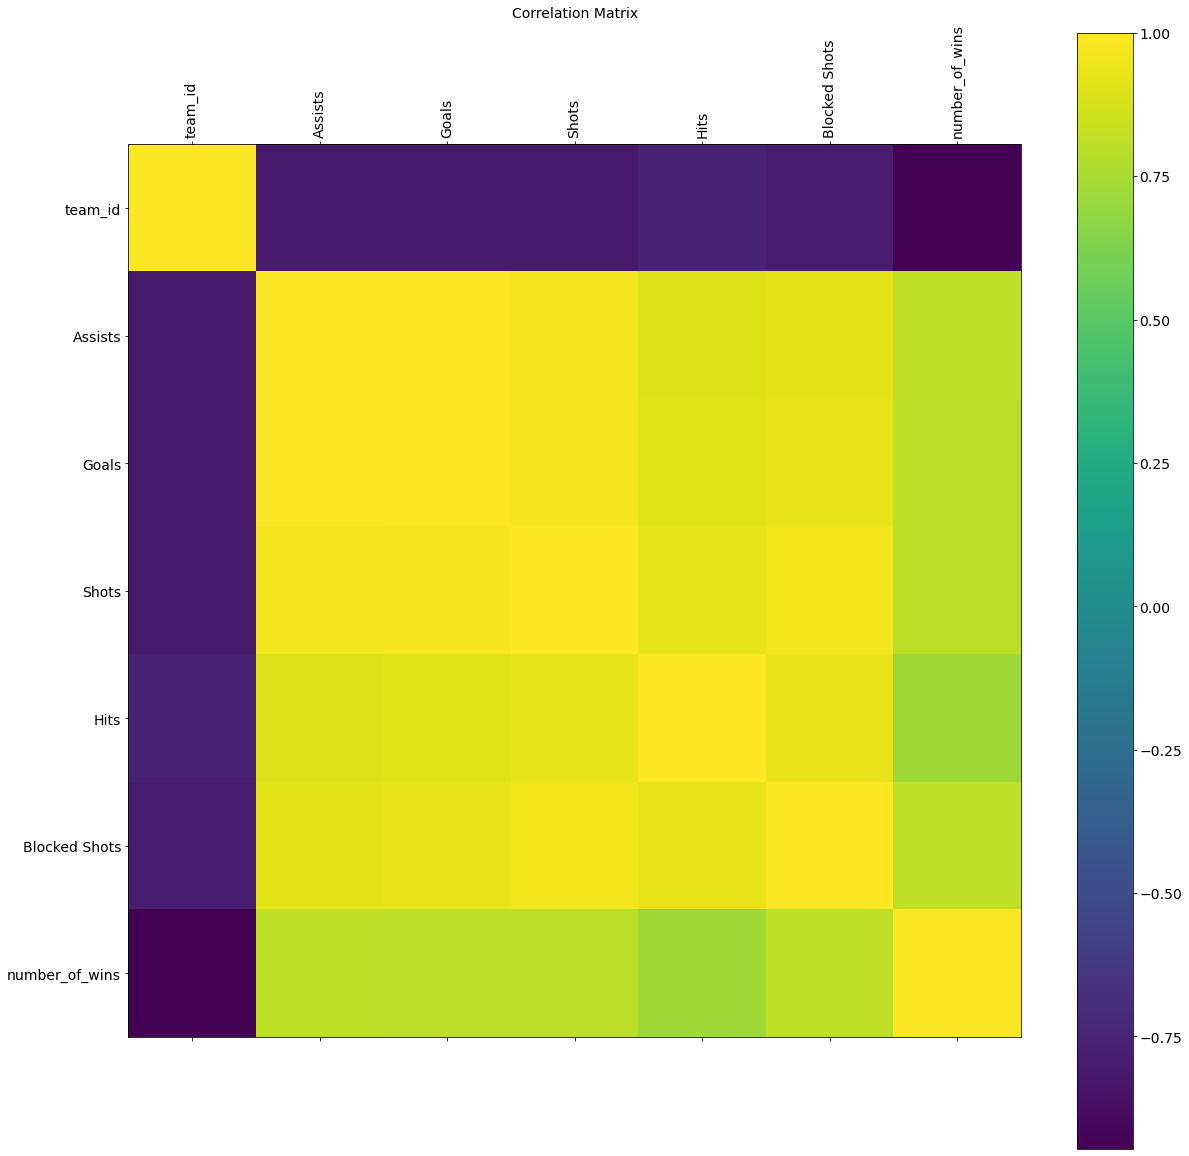

In [8]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(20, 20)) # figure size 
plt.matshow(df_relationships.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_relationships.shape[1]), df_relationships.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_relationships.shape[1]), df_relationships.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# 3) Creating a correlation heatmap using seaborn

In [9]:
df_relationships.columns

Index(['team_id', 'Assists', 'Goals', 'Shots', 'Hits', 'Blocked Shots',
       'number_of_wins'],
      dtype='object')

In [10]:
# Create a subset excluding the game_id, player_id, team_id, season, type, date_time_GMT, away_team_ID, home_team_ID, outcome, home_rink_side_start, venue, venue_link, venue_time_zone_id, venue_time_zone_offset, venue_time_zone_tz

sub_2 = df_relationships[['team_id', 'Assists', 'Goals', 'Shots','Hits', 'Blocked Shots', 'number_of_wins']]

In [11]:
sub_2

,team_id,Assists,Goals,Shots,Hits,Blocked Shots,number_of_wins
0,1,662,404,4605,3305,2191,1691
1,2,825,495,5252,5204,3032,1743
2,3,771,456,4630,3731,2292,1768
3,4,865,506,5182,3798,2380,1735
4,5,854,504,5164,4496,2225,1786
5,6,993,592,6134,4745,2518,1822
6,7,690,414,4718,2882,1762,1669
7,8,778,474,5476,4389,2224,1732
8,9,725,432,4603,3761,2451,1709
9,10,922,550,5451,2963,2185,1709


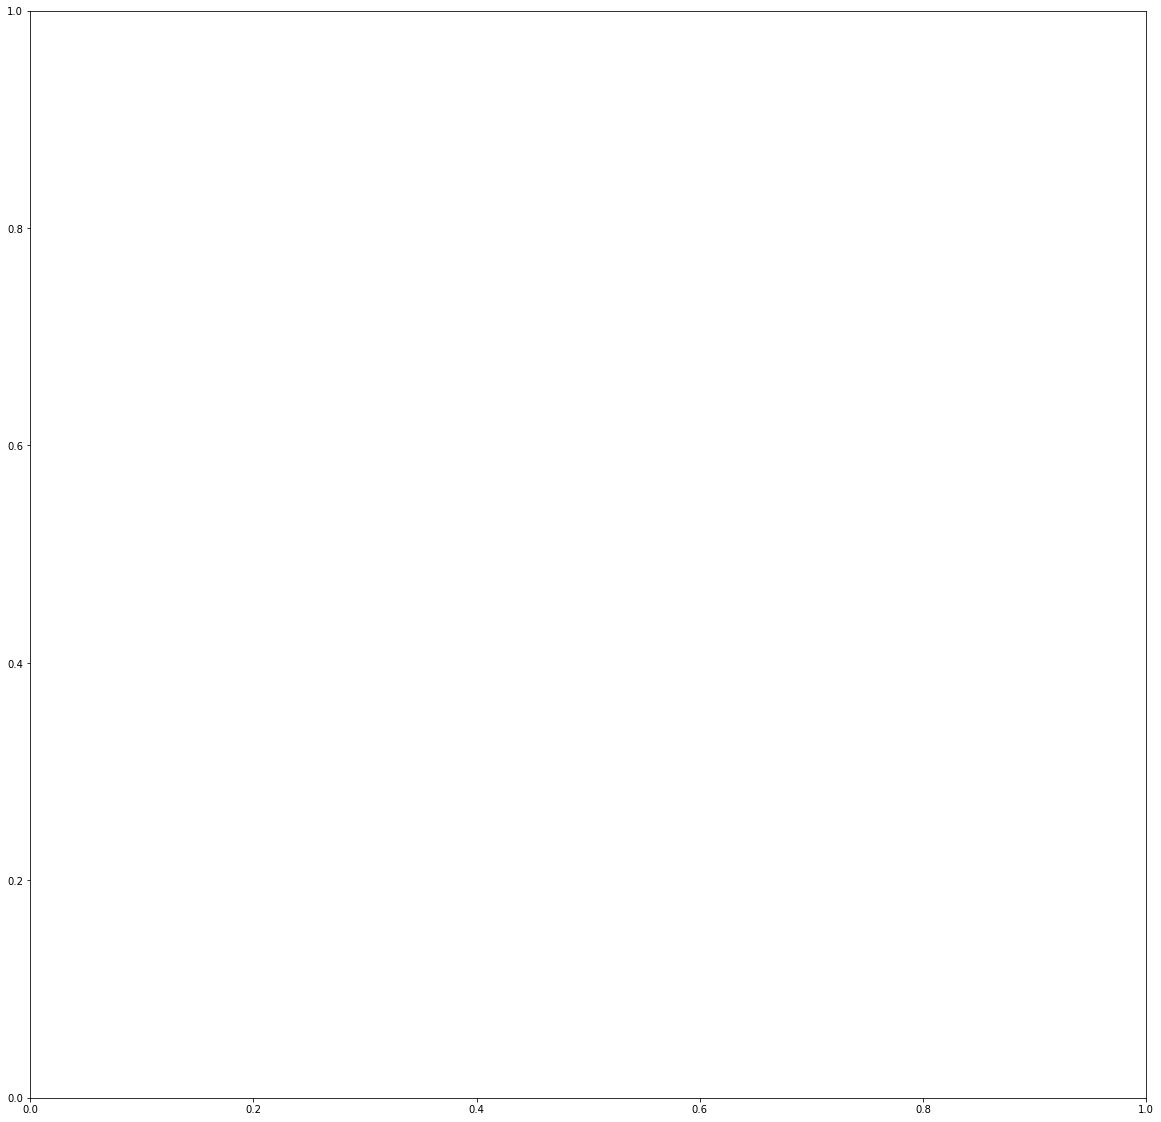

In [12]:
# Create a subplot with matplotlib.

f,ax = plt.subplots(figsize=(20,20))

In [13]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr_2 = sns.heatmap(sub_2.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

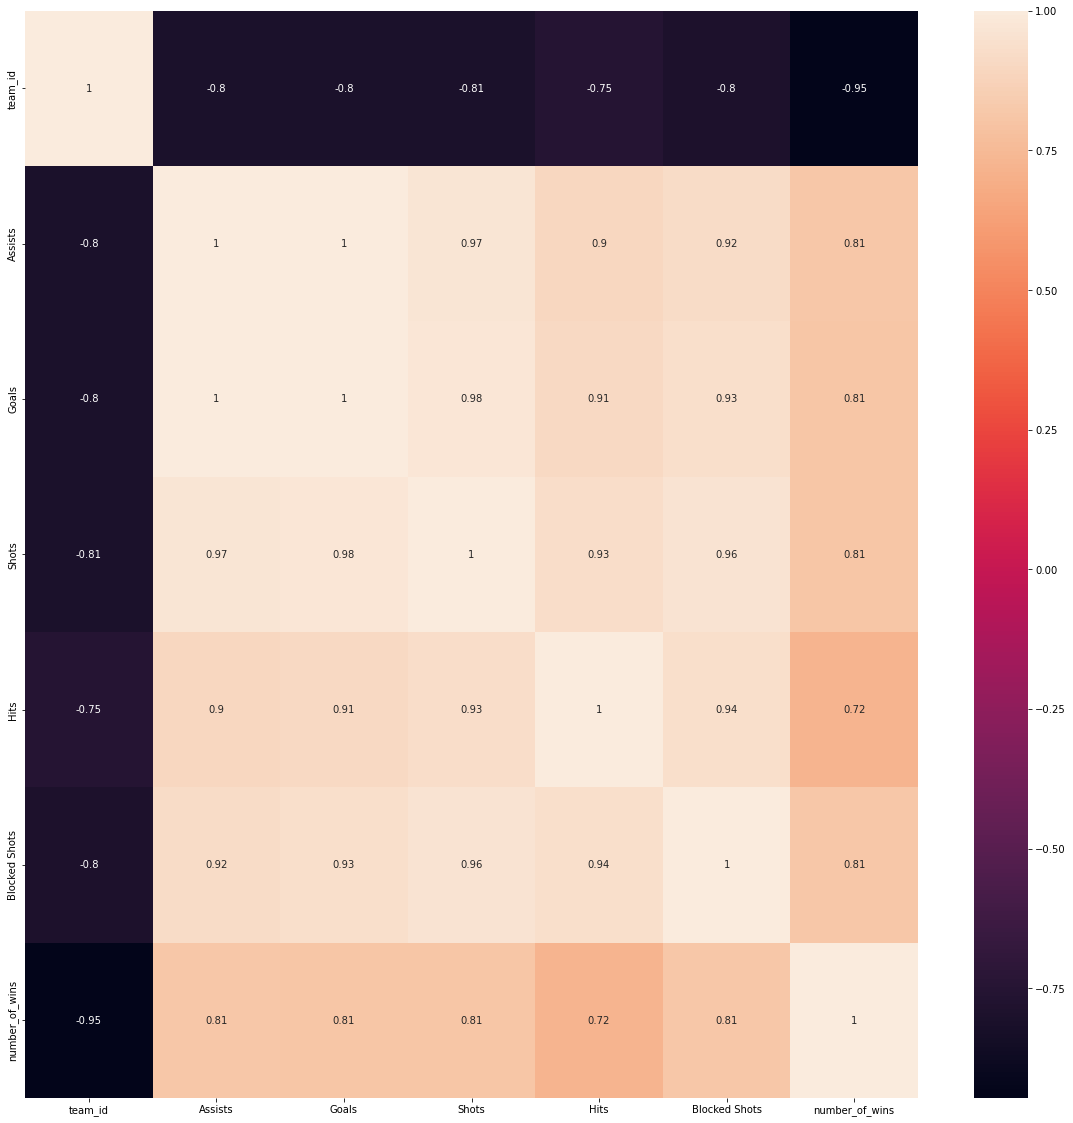

In [14]:
corr_2.figure

There seems to be a large number of positive correlations here. Goals, assists, shots and blocked shots have a correlation coefficient of 0.81. 

# 4) Creating Scatterplots

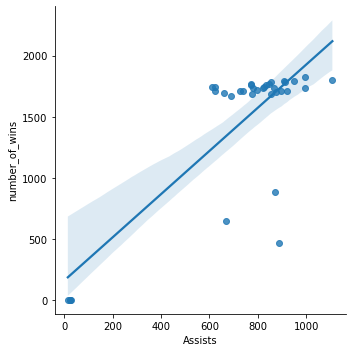

In [15]:
# Create a scatterplot for the "Assists" and "Number of Wins" columns in seaborn

sns.lmplot(x = 'Assists', y = 'number_of_wins', data = df_relationships)

As a team gets more assists, their number of wins increases. 

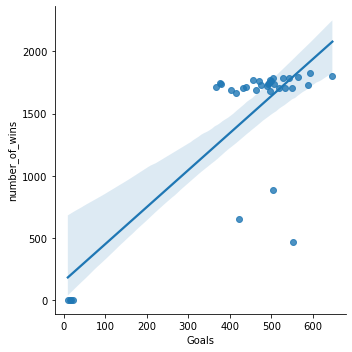

In [16]:
# Create a scatterplot for the "Goals" and "Number of Wins" columns in seaborn

sns.lmplot(x = 'Goals', y = 'number_of_wins', data = df_relationships)

As more goals are scored by the team, the more the team wins. 

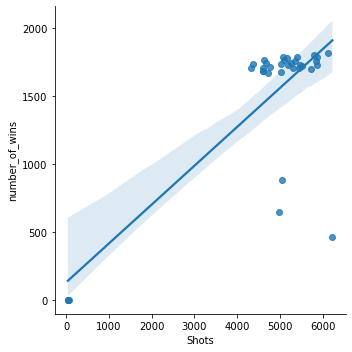

In [17]:
# Create a scatterplot for the "assists" and "powerPlayAssists" columns in seaborn

sns.lmplot(x = 'Shots', y = 'number_of_wins', data = df_relationships)

As shots increase so does the number of a team's wins.

# 5) Pair Plots

In [18]:
# Keep only the variables you want to use in the pair plot

sub_3 = sub_2[['Goals', 'Shots', 'Assists', 'Blocked Shots','Hits', 'number_of_wins']]

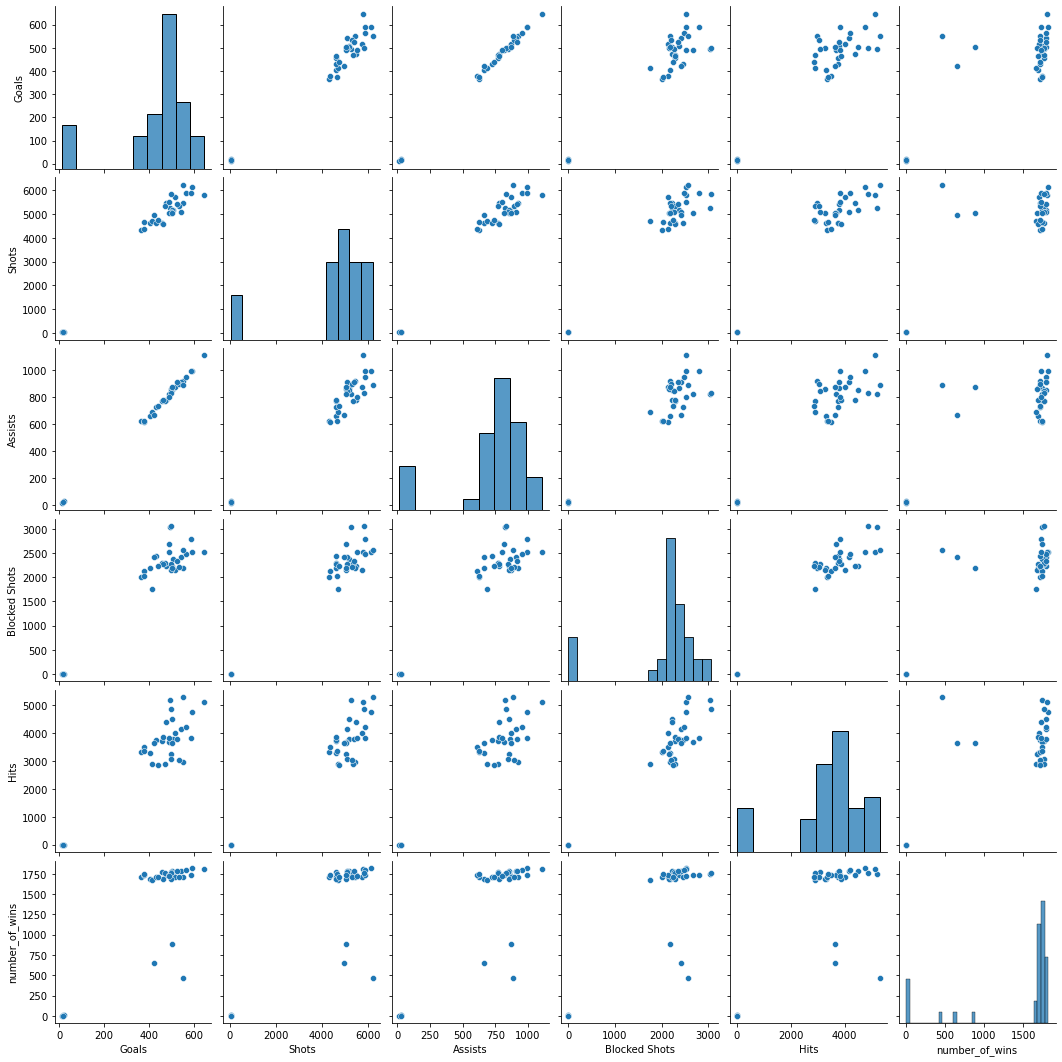

In [19]:
# Create a pair plot 

g = sns.pairplot(sub_3)

The variables that I would like to investigate further is shots and goals, hits and number of wins and hits and goals. 

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_wins', ylabel='Density'>

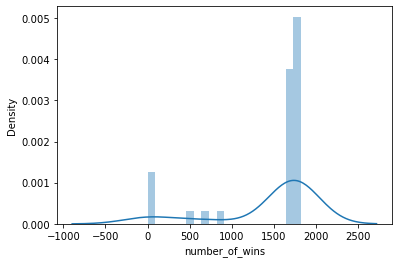

In [20]:
# Use a histogram to visualize the distribution of the variables. This way, you can determine sensible categories for the price ranges. You don't want to end up with too few observations in any one of the categories.

sns.distplot(df_relationships['number_of_wins'], bins = 20)

# 6) List of questions to explore

#### 1) Do other factors impact win percentage?

Look into power play minutes, shutouts, giveaways, takeaways.

#### 2.	Do more hits mean more goals for a team?

As you can see from the pait plot, these two variables seem to be positively correlated. 

#### 3.	How would this information on win success benefit a person?

This information would benefit a person as if they knew what factors led a team to win more games they could look at those factors, see if they are present and do things like bet on a team to win or a player to score.

#### 4. Is the number of goals correlated with shots

Yes these two variables, as previously seen in the pair plot discussed are correlated.

# 7) Hypotheses

1. As a players shots increase so does their number of goals.

2. As a players powerplay time increases so does their number of shots

3. Teams that block more shots win a higher number of games.

4. Teams that hit during games have higher number of wins than teams that do not. 

In [23]:
# Checking to see if we are good to export
df_relationships.head()

,team_id,Assists,Goals,Shots,Hits,Blocked Shots,number_of_wins
0,1,662,404,4605,3305,2191,1691
1,2,825,495,5252,5204,3032,1743
2,3,771,456,4630,3731,2292,1768
3,4,865,506,5182,3798,2380,1735
4,5,854,504,5164,4496,2225,1786


# 8) Exporting the df_relationships

In [ ]:
# Exporting the finished dataframe
# Exporting df_clean
df_relationships.to_csv(os.path.join(path, '02 Data','Prepared', 'data_relationships.csv'))